# **Email_Spam_Detection Using Machine Learning**

## Importing necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [2]:
email_df = pd.read_csv("/content/spam_ham_dataset.csv")

In [3]:
email_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
email_df.shape

(5171, 4)

## Data Processing

In [5]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


### Remove unwanted columns

In [6]:
email_df =email_df.drop(['Unnamed: 0', 'label_num'], axis=1)

In [7]:
email_df.columns

Index(['label', 'text'], dtype='object')

### Remove Duplicates Values

In [8]:
email_df =email_df.drop_duplicates()

### Remove punctuations and convert text to lowercase

In [9]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Remove stop words

In [11]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text)

## Exploratory Data Analysis(EDA)

### Explore the distribution of the target variable "label":

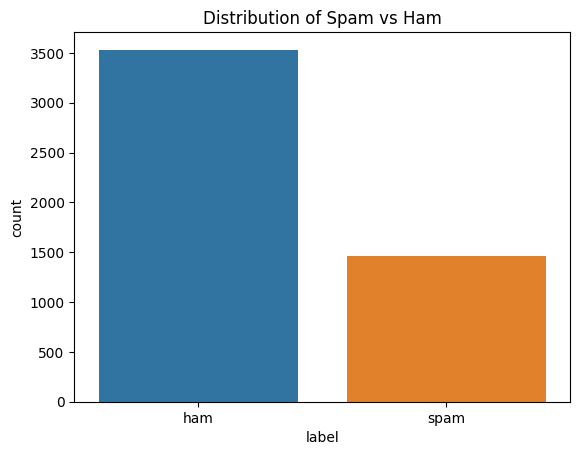

In [12]:
sns.countplot(x='label', data=email_df)
plt.title('Distribution of Spam vs Ham')
plt.show()

### Explore the length of the emails:

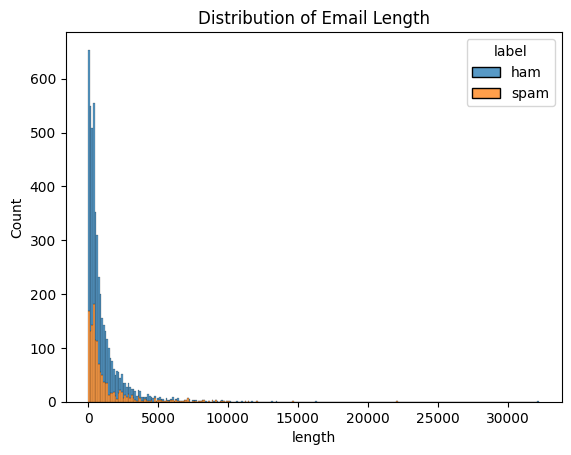

In [13]:
email_df['length'] = email_df['text'].apply(len)
sns.histplot(data=email_df, x='length', hue='label', multiple='stack')
plt.title('Distribution of Email Length')
plt.show()

### Explore the most common words in spam and ham emails:

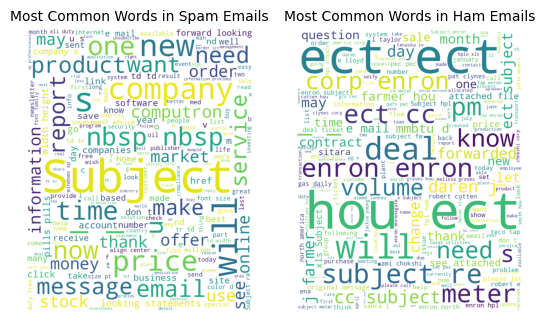

In [14]:
from wordcloud import WordCloud

spam_text = ' '.join(email_df[email_df['label']=='spam']['text'])
ham_text = ' '.join(email_df[email_df['label']=='ham']['text'])

spam_wc = WordCloud(width=800, height=1000, background_color='white', stopwords=None).generate(spam_text)
ham_wc = WordCloud(width=800, height=1000, background_color='white', stopwords=None).generate(ham_text)

plt.subplot(1, 2, 1)
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Most Common Words in Spam Emails',fontdict = {'fontsize':10})
plt.subplot(1, 2, 2)
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Most Common Words in Ham Emails',fontdict = {'fontsize':10})

plt.show()


In [15]:
X=email_df['text']
X

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 4993, dtype: object

In [16]:
y=email_df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(email_df['text'], email_df['label'], test_size=0.2, random_state=42)

In [18]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(4993,)
(3994,)
(999,)


In [19]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [21]:
y_pred = pipeline.predict(X_test)

## Evaluate the performance of the model

### 1.Calulating Accuracy

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9719719719719719


### 2.Calculating Precision

In [23]:
print("Precision:", precision_score(y_test, y_pred, pos_label='spam'))

Precision: 0.9442379182156134


### 3.Calculating Recall

In [24]:
print("Recall:", recall_score(y_test, y_pred, pos_label='spam'))

Recall: 0.951310861423221


### 4.Caculating F1-Score

In [25]:
print("F1-score:", f1_score(y_test, y_pred, pos_label='spam'))

F1-score: 0.9477611940298508


### Calculating Confusion Matrix

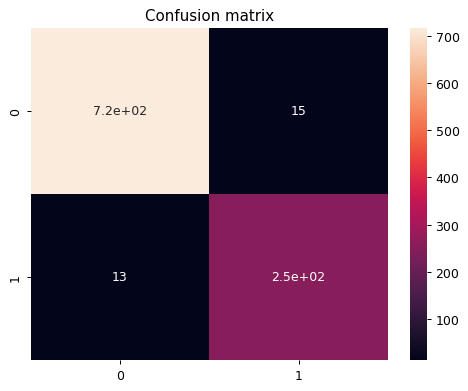

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=90)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()